In [3]:
import numpy as np
#from scipy import special
import matplotlib
import matplotlib.pyplot as plt

print(matplotlib.matplotlib_fname())
params = {
   'axes.labelsize': 8,
   'font.size': 8,
   'legend.fontsize': 9,
   'xtick.labelsize': 9,
   'ytick.labelsize': 9,
   'text.usetex': False,
   'figure.figsize': [8, 5],
   'errorbar.capsize': 3,
   'lines.linewidth': .8,
   'font.family': 'CMU Serif',
   'mathtext.fontset': 'cm'
}
plt.rcParams.update(params)

/usr/lib64/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc


In [4]:
x = np.linspace(-4, 4, 1000)
s = ["-", "--", ":", "-."]

def harmonic_sphere(l,m,θ,φ):
    if l == 1:
        if m == -1:
            return 

# for n in [0, 1, 2]:
def harmonic(n,x,t):
    return np.exp(-.5j * (n + .5) * t) * np.sqrt(1/(np.sqrt(np.pi) * 2**n * np.math.factorial(n))) * special.hermite(n)(x)*np.exp(-(x**2)/2)

def d(x,t):
    return (1/np.sqrt(2)) * (harmonic(0,x,t) + harmonic(1,x,t))

def q(x,t):
    return (1/np.sqrt(2)) * (harmonic(0,x,t) + harmonic(2,x,t))

f, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, sharex='col', sharey='row',figsize=(8,11))

a1 = [ax1, ax2]
a2 = [ax3, ax4]
a3 = [ax5, ax6]
a4 = [ax7, ax8]

[0, 1, 2, 4]

for t in [[0, a1], [1, a2], [2, a3], [4, a4]]:
    t[1][0].plot(x, np.imag(d(x,t[0]*np.pi)), label="$\Im D({}\hbar\pi / (E_G (2 n + 1)))$".format(t[0]), color="black", linestyle=s[0])
    t[1][0].plot(x, np.real(d(x,t[0]*np.pi)), label="$\Re D({}\hbar\pi / (E_G (2 n + 1)))$".format(t[0]), color="black", linestyle=s[1])
    t[1][1].plot(x, np.imag(q(x,t[0]*np.pi)), label="$\Im Q({}\hbar\pi / (E_G (2 n + 1)))$".format(t[0]), color="black", linestyle=s[0])
    t[1][1].plot(x, np.real(q(x,t[0]*np.pi)), label="$\Re Q({}\hbar\pi / (E_G (2 n + 1)))$".format(t[0]), color="black", linestyle=s[1])    
    t[1][0].legend()
    t[1][1].legend()

plt.tight_layout()
plt.savefig("3b.pdf")
plt.show()

NameError: name 'special' is not defined

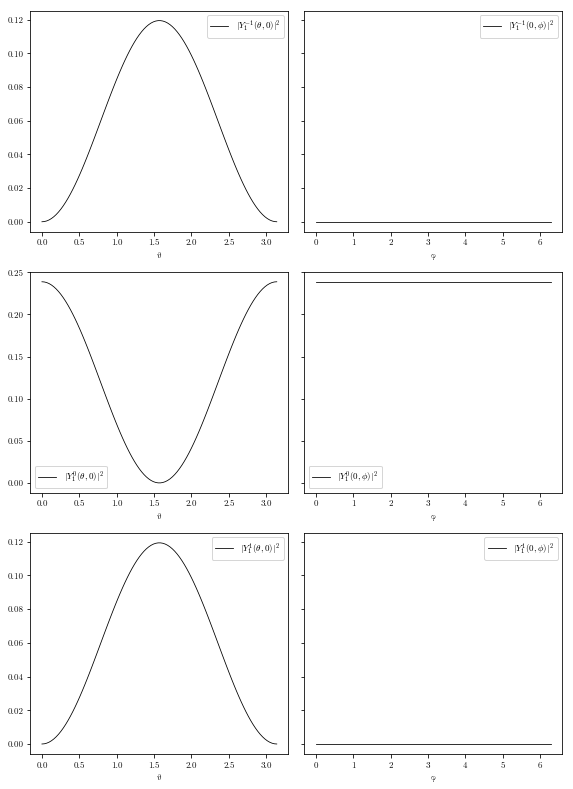

In [85]:
theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2*np.pi, 100)
one = np.linspace(1,1,100)
s = ["-", "--", ":", "-."]

def hs(l,m,θ,φ):
    if l == 1:
        if m == -1:
            return -np.sqrt(3/(8*np.pi)) * np.sin(θ) * np.exp(-1j*φ)
        elif m == 1:
            return np.sqrt(3/(8*np.pi)) * np.sin(θ) * np.exp(1j*φ)
        elif m == 0:
            return np.sqrt(3/(4*np.pi)) * np.cos(θ) * one

f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, sharey='row',figsize=(8,11))

a1 = [ax1, ax2]
a2 = [ax3, ax4]
a3 = [ax5, ax6]

for [m, t] in [[-1, a1], [0, a2], [1, a3]]:
    t[0].plot(theta, np.abs(hs(1,m,theta,0))**2, label=r"$|Y_1^{{{}}}(\theta, 0)|^2$".format(m), color="black", linestyle=s[0])
    t[1].plot(phi, np.abs(hs(1,m,0,phi))**2, label=r"$|Y_1^{{{}}}(0, \phi)|^2$".format(m), color="black", linestyle=s[0])
    t[0].legend()
    t[1].legend()
    t[0].set(xlabel='θ')
    t[1].set(xlabel='φ')
plt.tight_layout()
plt.savefig('d.pdf')
plt.show()


# result = func(x[:,None], y[None,:])
#print(theta[:,None]*phi[None,:])

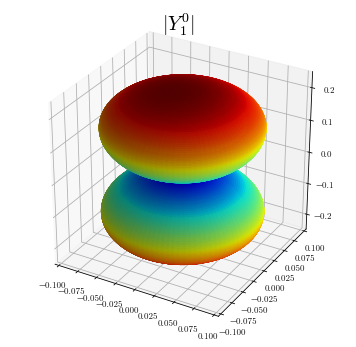

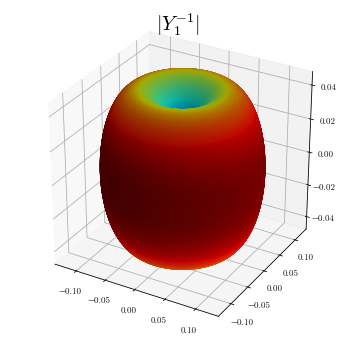

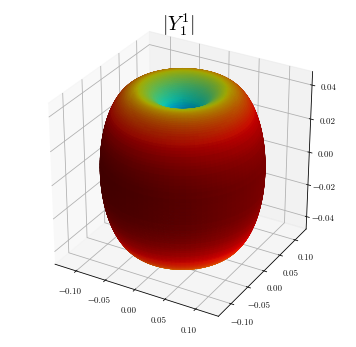

In [84]:
from mpl_toolkits.mplot3d import axes3d, Axes3D

for m in [0,-1,1]:
    PHI, THETA = np.mgrid[0:np.pi:200j, 0:2*np.pi:100j] 
    R = np.abs(hs(1,m,PHI,THETA))**2
    X = R * np.sin(PHI) * np.cos(THETA)
    Y = R * np.sin(PHI) * np.sin(THETA)
    Z = R * np.cos(PHI)
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(1,1,1, projection='3d')
    ax.set_title(r'$|Y^{{{}}}_{}|$'.format(m,1), fontsize=20)
    N = R / R.max()
    plot = ax.plot_surface(
         X, Y, Z, rstride=1, cstride=1, facecolors=cm.jet(N),
        linestyle="None", antialiased=True)

    plt.savefig('d{}.pdf'.format(m))
    plt.show()

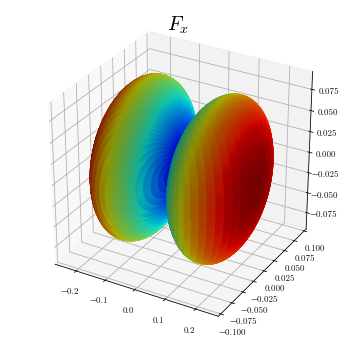

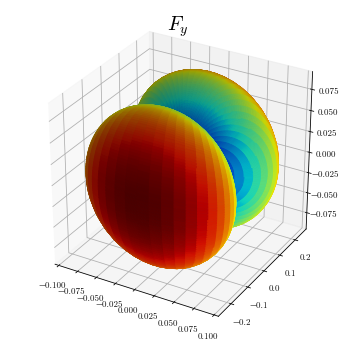

In [88]:
fx = lambda θ,φ: (1/np.sqrt(2)) * (hs(1,1,θ,φ) - hs(1,-1,θ,φ))
fy = lambda θ,φ: (1/np.sqrt(2)) * (hs(1,1,θ,φ) + hs(1,-1,θ,φ))
fz = lambda θ,φ: hs(1,0,θ,φ)

from mpl_toolkits.mplot3d import axes3d, Axes3D

for [f,n] in [[fx,"$F_x$"],[fy,"$F_y$"]]:
    PHI, THETA = np.mgrid[0:np.pi:200j, 0:2*np.pi:100j] 
    R = np.abs(f(PHI,THETA))**2
    X = R * np.sin(PHI) * np.cos(THETA)
    Y = R * np.sin(PHI) * np.sin(THETA)
    Z = R * np.cos(PHI)
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(1,1,1, projection='3d')
    ax.set_title(n, fontsize=20)
    N = R / R.max()
    plot = ax.plot_surface(
         X, Y, Z, rstride=1, cstride=1, facecolors=cm.jet(N),
        linestyle="None", antialiased=True)

    plt.savefig('e{}.pdf'.format(n))
    plt.show()